### Ex2.1
2 actions and $\epsilon = 0.5$,   
probability of greedy action being selected =   
$0.5+0.5*(\frac{1}{2}) = 0.75$  
Since $\epsilon = 0.5$, either it chose the greedy action in case 1 or if it's randomly going to choose, then it has two options to choose from. So two cases and in case 2 it has two choices to choose from. 

### Ex2.2
k = 4 actions 
Q1(a) = 0 initially for all a (expected value from action a) 

A1 = 1, R1 = -1, 
A2 = 2, R2 = 1, 
A3 = 2, R3 = -2, 
A4 = 2, R4 = 2, 
A5 = 3, R5 = 0

At some of these time steps e (epsilon) case may have occured i.e an action could have been selected at random. It is using the sample-average method.

$$Q_t(a) = \frac{\text{sum of rewards when taken prior to t}}{\text{number of times a taken prior to t}}$$

* Q1(a) = 0 (for all a)
___
* Q2(1) = $\frac{-1}{1} = -1$  
Q2($A - \{1\}$) = 0 (because haven't observed any other actions yet) (actions other than 1)  
___
* Q3(1) = -1  
Q3(2) = $\frac{1}{1} = 1$  
Q3($A - \{1,2\}$) = 0
___
* Q4(1) = -1  
Q4(2) =  $\frac{1+(-2)}{2} = \frac{-1}{2} = -0.5 $  
Q4($A - \{1,2\}$) = 0
___
* Q5(1) = -1  
Q5(2) = $\frac{1+(-2)+2}{3} = \frac{1}{3} = 0.33 $    
Q5($A - \{1,2\}$) = 0
___ 

Action |Q1 |Q2 |Q3 |Q4  |Q5
-------|---|---|---|--- |---
1      | 0 |-1 |-1 |-1  |-1  | 
2      | 0 | 0 | 1 |-0.5|0.33|
3      | 0 | 0 | 0 | 0  | 0  |
4      | 0 | 0 | 0 | 0  | 0  |
5      | 0 | 0 | 0 | 0  | 0  |
action taken | a1| a2| a2| a2| a3


* **Time steps at which this definitely occured** =   
t = 4 (because it should have picked a3,a4,a5 greedily but picked a2 instead)   

* **Time steps at which this could have possibly occured** =   
all of the time steps because it's definitely possible that it went into the $\epsilon$ case and then still picked the greedy choice 

### Ex 2.3
In the long run, $\epsilon = 0.01$ will perform better, because it will pick the optimal moves   
$$0.99 + 0.01*(1/10) = 0.99 + 0.001 = 0.991 = 99.1\% $$ of the time

(Case 1 where it picks greedy + case 2 and then in case 2 picks greedy randomly)*   

However in $\epsilon = 0.1$ it will pick the optimal moves  
$$0.9 + 0.1*(1/10) = 0.9 + 0.01 = 0.91 = 91\% $$ of the time 

So in the long run $\epsilon = 0.01$ will perform better, but $\epsilon = 0.1$ will improve faster.

**\*Made the assumption that there is only one greedy choice to pick from so 1/10 otherwise in practise it could be 2/10 or anything else, cause there could be more than on choice that is the greedy one**

### Ex 2.4 

Using non-constant step-size parameter $\alpha_n$ we get - 
$$ Q_{n+1} = \prod_{i=1}^{n} (1-\alpha_i) Q_1 + \sum_{i=1}^{n} \alpha_i \prod_{j=i+1}^{n} (1-\alpha_j) R_i $$



### Ex2.6

**Q)** Exercise 2.6: Mysterious Spikes The results shown in Figure 2.3 should be quite reliable because they are averages over 2000 individual, randomly chosen 10-armed bandit tasks. Why, then, are there oscillations and spikes in the early part of the curve for the optimistic method? In other words, what might make this method perform particularly better or worse, on average, on particular early steps?

_______

**Ans)** 
For particular early steps it's possible that the actions it hasn't explored yet are the optimal ones, and since they have optimistic initial values, it's bound to explore them and that causes the spike in the graph. 

### Ex2.7

Not sure yet 

### Ex2.8 

$$ A_t = argmax_a[Q_t(a) + c \sqrt{\frac{\ln (t)}{N_t(a)}}]$$

* where $N_t(a) = \text{number of times a has been selected prior to time t}$ 
* $c > 0$ is a constant
* If $N_t(a) = 0 $ then a is considered maximizing action

At t =11, for k=10 bandits, it would have selected all the other bandits exactly once before. S0 at t=11 the uncertainity between all the bandits is the same, and it would pick the one with the best estimated Q value so far. In subsequent steps the uncertainity for the other bandits would increase (since $ln t$ is increasing and $N_t(a)$ is remaining the same). So for a sufficiently large c it would be more inclined to explore those options, and as a result not pick the greedy options. So the reward decreases in subsequent steps. 

### Ex 2.9
For k = 2 
$$ \frac{1}{1+e^{H_t(2)-H_t(1)}} $$


### Ex 2.10 

**Q)** Exercise 2.10 Suppose you face a 2-armed bandit task whose true action values change randomly from time step to time step. Specifically, suppose that, for any time step, the true values of actions 1 and 2 are respectively 0.1 and 0.2 with probability 0.5 (case A), and 0.9 and 0.8 with probability 0.5 (case B). If you are not able to tell which case you face at any step, what is the best expectation of success you can achieve and how should you behave to achieve it? Now suppose that on each step you are told whether you are facing case A or case B (although you still don’t know the true action values). This is an associative search task. What is the best expectation of success you can achieve in this task, and how should you behave to achieve it?

____

**Ans)** 
$$E[A1] = 0.5*0.1 + 0.5*0.9 = 0.5$$

$$E[A2] = 0.5*0.2 + 0.5*0.8 = 0.5$$

So best expected value is 0.5, and you can pick either A1 or A2 to achieve it.

If you knew which Case you are in, then in **Case A pick A2**, and in **Case B pick A1**


### Ex2.11 

**Q)** Exercise 2.11 (programming) Make a figure analogous to Figure 2.6 for the nonstationary case outlined in Exercise 2.5. Include the constant-step-size "$\epsilon$-greedy algorithm with $\alpha$=0.1. Use runs of 200,000 steps and, as a performance measure for each algorithm and parameter setting, use the average reward over the last 100,000 steps.



### Ex2.5

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline



k = 10
epsilon = 0.1 

#indexing actions by index in list so Q[0] is for a0 
q = [1]*k #initially they are all equal 
Q = [0]*k #intial estimates 
N = [0]*k #initial n values, number of times the action has occured essentially 


def bandit(action):
    """
    Returns reward for action by adding noise at each call to q  
    """
    global q
    noise = np.random.normal(0,0.01,10) #generate 10 values with mean 0 and sd 0.01 from a normal distribution
    q = np.add(q, noise)
    #return q[action]
    #if you want noise in reward
    return np.random.normal(q[action],1)    
    
def simActionVal(timeSteps, alpha=0):
    """
    When alpha = 0 (default)
    Simulates for specified time steps the sample average method i.e action value method 
    using alpha = 1/n 
    
    Otherwise (alpha != 0)
    Simulates for specified time steps the exponential recency-weighted average i.e action value method 
    using a constant alpha
    
    Returns rewards received as a list with index of the reward indicative of the time step 
    and whether it picked the optimal action or not for each time step as a list of 1's and 0's
    (1 = picked optimal, 0 = didn't pick optimal)
    """
    global q, Q , N
    
   
    rewards = [] #rewards received 
    pickedBestAction = [] #1 represents that it picked the optimal/best action 
    #totalReward = 0
    #averageRewards = []
    #optimalActions = [] # percentage of times it picked the best action upto kth time step 
    
    pickedBest = 0 
    
    for a in range(timeSteps):
        if random.random()<epsilon: #pick an action randomly
            action = random.randint(0,k-1) #randint takes inclusive of upper bound
        else : 
            action = np.argmax(Q) #argMax_a Q(a)
        
        R = bandit(action) #reward 
        N[action] = N[action] + 1 
        
       
        #totalReward += R  
        #averageRewards.append((totalReward/(a+1)))
        
        rewards.append(R) #add the reward received at time step 'a' 
      
        bestAction = np.argmax(q) #any of the optimal ones if I picked it 
        
        if bestAction == action: 
            pickedBest += 1
            pickedBestAction.append(1) 
        else:
            pickedBestAction.append(0)
        
        #optimalActions.append(pickedBest/(a+1))
        
        #Sample average
        if alpha == 0: 
            Q[action] = Q[action] + (1/N[action])*(R-Q[action]) 
        #constant alpha
        else :         
            Q[action] = Q[action] + (alpha)*(R-Q[action]) 
            
    return rewards, pickedBestAction

def reInit():
    """
    Re intialises values for q, Q and N 
    """
    global q, Q, N 
    q = [1]*k #initially they are all equal 
    Q = [0]*k #intial estimates 
    N = [0]*k #initial n values, number of times the action has occured essentially 






In [103]:
steps = 2000

In [104]:
def simIndependentRuns(runs, timeSteps=steps, alpha=0):
    reInit()
    rMean = []
    optimalMean = []

    for a in range(runs):
        r,b = simActionVal(timeSteps,alpha)
        if a == 0:
            rMean = r
            optimalMean = b
        else : 
            rMean = np.add(rMean,r)
            optimalMean = np.add(optimalMean,b)
        reInit() 
    return np.array(rMean)/runs,np.array(optimalMean)/runs

In [105]:
rMean, optimalMean = simIndependentRuns(1000, alpha=0)



In [106]:
rMean2, optimalMean2 = simIndependentRuns(1000, alpha=0.1)


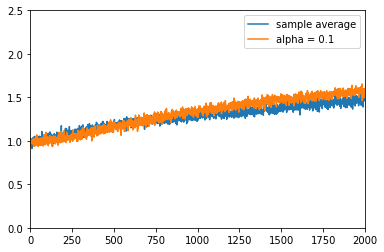

In [111]:
#plt.yticks(np.arange(0, 1, step=0.2))
#plt.yticks(np.arange(0, 1.5, step=0.5))
plt.axis([0,steps,0,2.5])
plt.yticks(np.arange(0, 3, step=0.5))
plt.plot(range(steps), rMean, label = "sample average")
plt.plot(range(steps), rMean2, label= "alpha = 0.1")
plt.legend()
plt.show()

#print(max(optimalMean2*100))

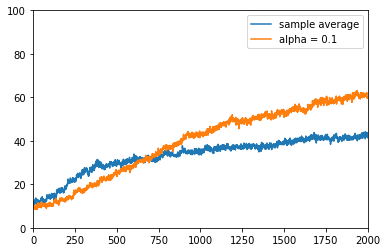

In [109]:
plt.axis([0,steps,0,100])
plt.plot(range(steps),optimalMean*100, label = "sample average")
plt.plot(range(steps),optimalMean2*100, label = "alpha = 0.1")
plt.legend()
plt.show()

In [373]:
print(optimalMean2)

[1. 0. 0. ... 0. 1. 1.]


In [1]:
import numpy as np
print(np.ones(10))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
